# Prologue

### This prologue chapter will describe what progress is made and what experiments are tried before the individual project is getting started.

I started this semester by looking through some of the datasets on Kaggle, but most of these datasets have many features and lots of data. But with all beginnings it is a good thing to start with something easy to predict and visualize.

The main experiment in the prologue will be trying to find a Kaggle dataset that has atleast a a little bit of a linear connection with the outcome and a single feature. This makes it possible to try out one of the simplest machine learning algorithms, Linear Regression. Because linear regression with only a single feature is so simple compared to the other algorithms  the plan is to write all the code for this algorithm from scratch to try and get a deeper understanding of how a computer can 'learn' things. Then later when the individual project is started the hope is that this deeper understanding can help me when I start using libraries to do the machine learning algorithms for me.

## Prologue backlog
- [x] Create a Jupyter notebook
- [x] Find a dataset with a possible linear correlation
- [x] Split the data in training and test data
- [x] Write the linear regression code
- [x] Train and test with the data
- [x] Visualize the results 

## The dataset

Prior to this prologue I watched a few videos on linear regression to get an idea about how it works and the the math involved.
[Linear Regression with Ordinary Least Squares Part 1](https://www.youtube.com/watchv=szXbuO3bVRk&ab_channel=TheCodingTrain)
In this video series from the coding train he uses the example of the linear connection between the temperature outside and the amount of ice cream sold. Of course many more features could be included such as the day of the week, humidity etc and it would likely give a more accurate prediction, but for learning purposes and to get started with linear regression just looking at the temperature will suffice. 

Kaggle has a lot of complicated datasets and after looking at datasets for a while before starting this prologue I decided to just look for the example given in the Coding Train video. And this is the dataset I found: [Ice Cream Revenue](https://www.kaggle.com/datasets/vinicius150987/ice-cream-revenue). The only problem I have with this dataset is that it only includes the temperature and the revenue. I would have liked more features to try and make a correlation heatmap to see if the temperature would be the biggest factor in determining the revenue. I will still try to do it with this dataset just to see what happens.

The revenue in the dataset is in US dollars and the temperature is in degrees Celcius.

In [1]:
import pandas as pd

# df = dataframe (Data sturcture in pandas)
df = pd.read_csv('Datasets/IceCreamData.csv')
print('Shape: ' + str(df.shape))
df.head()

Shape: (500, 2)


,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


## Splitting the dataset

To have unseen data to verify the results the data will be split up in training and test data. For now the data will be arbitrarily split into **80% training data and 20% test data**.

In [2]:
from sklearn.model_selection import train_test_split
import math

train_data, test_data = train_test_split(df, test_size=0.2)
print('Training data shape: {}'.format(train_data.shape))
print('Test data shape: {}'.format(test_data.shape))
train_percent = math.floor(train_data.shape[0] / df.shape[0] * 100)
test_percent = math.floor(test_data.shape[0] / df.shape[0] * 100)
print('Split percentage (Training|Test) ({}|{})'.format(train_percent, test_percent))

Training data shape: (400, 2)
Test data shape: (100, 2)
Split percentage (Training|Test) (80|20)


## Plotting the dataset and predictions

I am going to plot the dataset to see if there is a linear correlation between the temperature and the revenue. The expectation is that there will be a linear correlation since the description of this dataset in Kaggle mentioned that the dataset 'is a simple sample dataset for training'. There could be a few outliers because the data is split up on revenue per day, but it also could be removed by the owner of the dataset because the dataset is just for beginners to get started.

And obviously the expectation is that the higher the temperature the higher the revenue will be. This means that the line that will be predicted will look something like this: ![Expected Line](Images/TemperatureRevenueExpected.png)
The formula for a line is y = mx+b and my prediction is that the value for b is going to be low as it is the intersection with the y-axis or the value when x = 0 which in this case means 0 degrees celcius.

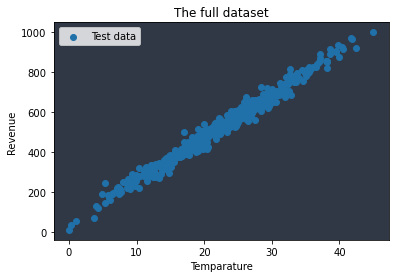

In [68]:
import matplotlib.pyplot as plt

# layout for all the graphs
plt_bg_color = '#303845'
plt_alpha = 0.08
plt_outline_color = 'white'

def setup_layout():
    fig = plt.figure()
    fig.patch.set_facecolor(plt_outline_color)
    fig.patch.set_alpha(plt_alpha)
    ax = fig.add_subplot(1,1,1)
    ax.set_facecolor(plt_bg_color)

def setup_graph():
    plt.xlabel('Temparature')
    plt.ylabel('Revenue')
    plt.legend(loc='upper left')
    plt.show()
    
setup_layout()
plt.title('The complete dataset')
plt.scatter(df['Temperature'], df['Revenue'], color = '#2071A9', label = 'All data')
setup_graph()

As expected the data points are clearly scattered in close proximity of a line. There are also no real outliers, which is not what I hoped because I would have liked to get some practice removing outliers from the dataset.

## Linear regression

In my understanding linear regression is a way for a machine to try and find the best linear formule for the training data that is given. Where the x-axis is the feature that is used for the prediction and the y-axis the value that is being predicted. The formula for a line is y = mx + b and since x is the input linear regression tries to find the best m and b value for the given data. After the best line for the data is found new input data can be given and the line can predict what the output will be.  

There also seem to be multiple methods to apply linear regression:
* Ordinary least squares
* Gradient descend

There might me more than the once listed above but these are the ones I found so far.
For this prologue I am atleast going to look at the ordinary least squares method first, because I already looked at gradient descend before starting this semester and the math can become very complex and gradient descend can also be used when training a neural network, so maybe something to look at later in the semester.

## Ordinary least squares

Ordinary least squares (OLS) is a way of estimating the unknown parameters (m and b) in a linear regression model. The algorithm that I am going to use for OLS is: ![OLS algorithm](Images/OlsCalcM.png)This algorithm was explained in part 2 of the Coding Train series [Linear Regression with Ordinary Least Squares Part 2 ](https://www.youtube.com/watch?v=_cXuvTQl090&ab_channel=TheCodingTrain) The algorithm looks at the squared sum of all the errors and tries to minimize the sum. The errors get squared to make the negative numbers (the errors below the predicted line) not cancel out the positive errors above the line. 

![OLS error](Images/OlsError.png)

The OLS algorithm needs the average of all the x and y values so I get those from the training data.

In [4]:
# There must be a more proper way to get the average of a DataFrame / series

x_train_data = train_data.loc[:,'Temperature'].tolist()
y_train_data = train_data.loc[:, 'Revenue'].tolist()
x_avg = sum(x_train_data) / len(x_train_data)
y_avg = sum(y_train_data) / len(y_train_data)
print('x average: {} | y average: {} '.format(x_avg, y_avg))

x average: 22.148733618057484 | y average: 518.96775696965 


After calculating the averages it is possible to apply the rest of the formula on the training data.
m is calculated with the formule shown earlier.
When m is known b is easy to calculate. Because a linear formula is **y = mx+b**, which can be written as **b + mx = y** if both sides are reduced with mx we get the formula for b. **b = y - mx**

In [5]:
m = b = 0

# Ordinary least squares
numerator = 0 # teller
denominator = 0 # noemer
for i in range(len(x_train_data)):
    x = x_train_data[i]
    y = y_train_data[i]
    numerator += (x - x_avg) * (y - y_avg)
    denominator += (x - x_avg) ** 2
m = numerator / denominator # could be scary if denominator is 0, but that is very unlikely 
b = y_avg - m * x_avg

print('y = {} * x + {}'.format(round(m,2), round(b,2)))

y = 21.41 * x + 44.82


If I did it right the best m value for the line is approximately **21.27** and the best b value would be approximately **49.18**. I don't have an idea on how to check if this is good or not or how to give it an accuracy score. But a good first indication might be too look at the average error between all points in the training and test data. The average error in the training data should be lower, but it might not be a huge difference without the outliers and a data set that fits linear regression so well.
> After re-running the Kernel it seems that the data that is taken when splitting is random. This means that the results are not exactly the same everytime the Kernel runs.

In [6]:
avg_error_train = 0;
for i in range(len(x_train_data)):
    x = x_train_data[i]
    y = y_train_data[i]
    avg_error_train += abs(y - (m * x + b))

avg_error_train /= len(x_train_data)


x_test_data = test_data.loc[:,'Temperature'].tolist()
y_test_data = test_data.loc[:, 'Revenue'].tolist()
avg_error_test = 0;

for i in range(len(x_test_data)):
    x = x_test_data[i]
    y = y_test_data[i]
    avg_error_test += abs(y - (m * x + b))

avg_error_test /= len(x_test_data)

print('Average error in training data: {} \nAverage error in test data: {}'
      .format(round(avg_error_train,2), round(avg_error_test,2)))

Average error in training data: 19.49 
Average error in test data: 20.04


To figure out if what I did was even remotely right I will try to loop through all reasonable values for m and b to see if I can find a line that can better represent the data. I get that this method is flawed because I it will only loop through integer numbers an ignore decimal values. But it still should give an indication if the line that I found is reasonable.

In [7]:
# bf = brute force
avg_error_bf = avg_error_train + 1;  
bf_errors = []


for m_val in range(50):
    for b_val in range(75):
        avg_error_bf = 0
        for i in range(len(x_train_data)):
            x = x_train_data[i]
            y = y_train_data[i]
            avg_error_bf += abs(y - (m_val * x + b_val))
        
        avg_error_bf /= len(x_train_data)
        bf_errors.append(avg_error_bf)
        if avg_error_bf <= avg_error_train:
             print('A BETTER LINE FOUND WITH M: {} AND B: {} avg error {}'.format(rand_m, rand_b, avg_error_random))

print('Lowest error found: {}\nLOS error: {}\nDifference: {}'
      .format(
          min(bf_errors),
          avg_error_train,
          min(bf_errors) - avg_error_train)
       )

Lowest error found: 19.62208868903251
LOS error: 19.487598611932263
Difference: 0.13449007710024574


This little test shows that there are atleast no rounded number within a reasonable range that fits the data closer than what I found using OLS. This result makes me think that I applied the algorithm correctly, but there still might be a better solution out there. 

And the difference between the brute force method and the OLS method is really low, in some splits less than 0.2. This was not what I expected. But OLS still gives a better result than this brute force method and will hold up better with a larger dataset, because the time to calculate the values doesn't increase exponentially.

The last way I will try to find if the results of the OLS algorithms are useful I will try to plot the test data and the prediction line in the same graph. If they overlap the line found by the algorithm is a good fit for the data. I didn't do this step earlier because I didn't know how to draw multiple things in a single graph, but after training more with the pandas course from Kaggle and reading documentation on the plotlib library I figured it out.

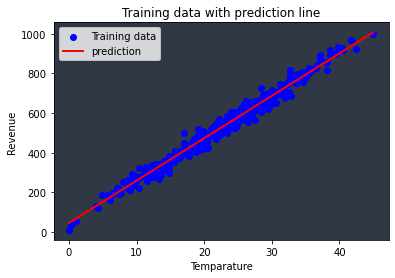

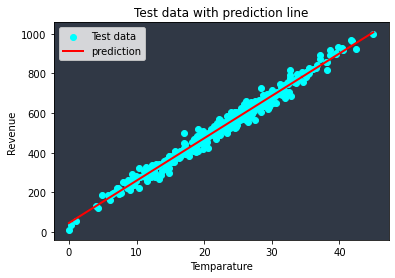

In [70]:
import numpy as np

# Setting up the line
min_x = df['Temperature'].min()
max_x = df['Temperature'].max()
x = np.linspace(min_x, max_x, 2) # create the outer points of the line

def draw_prediction_graph(title, label, dataset, scatter_color):
    setup_layout()
    plt.title(title)
    plt.scatter(dataset['Temperature'], dataset['Revenue'], color = scatter_color, label = label)
    plt.plot(x, m * x + b, color = 'red', label = 'prediction', linewidth = 2)
    setup_graph()
    
# Training data with prediction
draw_prediction_graph('Training data with prediction line', 'Training data', train_data, 'blue')

# Test data with prediction
draw_prediction_graph('Test data with prediction line', 'Test data', train_data, 'cyan')






## Conclusion

// it worked well,
// a good way to verify is to plot a line against the data
// but ofcourse only a good way when the data has a strong linear correlation



## Inspiration

// Open AI
// Genetic algorithms -> coding train / code bullet